In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from wrangle import wrangle_telco

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,total_charges_scaled,tenure_less_than_12,tenure_less_than_8
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,...,No,Yes,2,2,1,No,False,0.066294,True,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,Yes,No,1,2,1,No,False,0.060420,True,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,Yes,1,1,2,Yes,False,0.030239,True,True
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,1,1,2,Yes,False,0.140670,False,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,No,Yes,1,2,2,Yes,False,0.028687,True,True


In [4]:
df.streaming_tv

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042    Yes
Name: streaming_tv, Length: 7043, dtype: object

### encode

In [5]:
# step 1 split
train, test = train_test_split(df)

In [6]:
# step 2 encode, no = 0, yes = 1 
encoder = LabelEncoder()

encode_list = [
    'gender', 'partner', 'dependents', 'phone_service'
    , 'multiple_lines', 'online_security', 'online_backup'
    , 'device_protection', 'tech_support'
    , 'streaming_movies', 'streaming_tv', 'paperless_billing', 'churn'
    ]
               
               
               
for c in encode_list:
    train[c] = encoder.fit_transform(train[c])
    test[c] = encoder.transform(test[c])

In [7]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,total_charges_scaled,tenure_less_than_12,tenure_less_than_8
6042,8563-IIOXK,1,0,1,1,7,49.75,331.30,1,0,...,0,1,2,1,1,1,False,0.036060,True,True
4762,6702-OHFWR,1,1,0,0,1,43.30,43.30,0,1,...,2,1,1,1,1,1,False,0.002827,True,True
386,0570-BFQHT,0,0,0,0,9,80.55,653.90,1,0,...,0,0,1,1,2,0,False,0.073286,True,False
4573,6447-EGDIV,0,0,0,0,31,20.95,683.25,1,0,...,1,0,2,2,3,0,False,0.076673,False,False
1888,2739-CCZMB,1,0,0,1,5,20.35,122.00,1,0,...,1,0,1,4,3,0,True,0.011909,True,True


### Distribution of churn rates

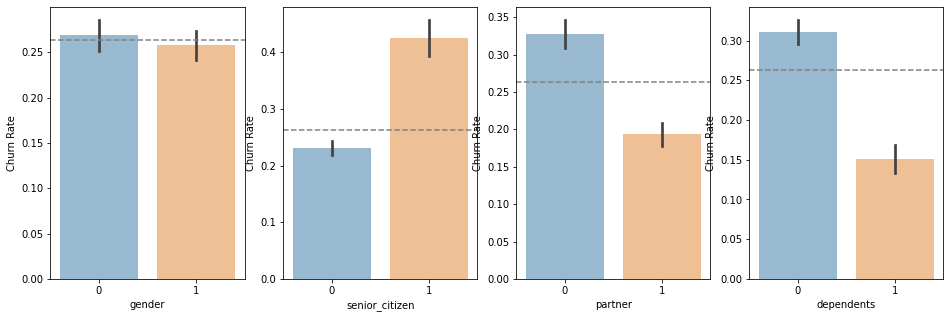

In [8]:
features = ['gender', 'senior_citizen', 'partner', 'dependents']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')


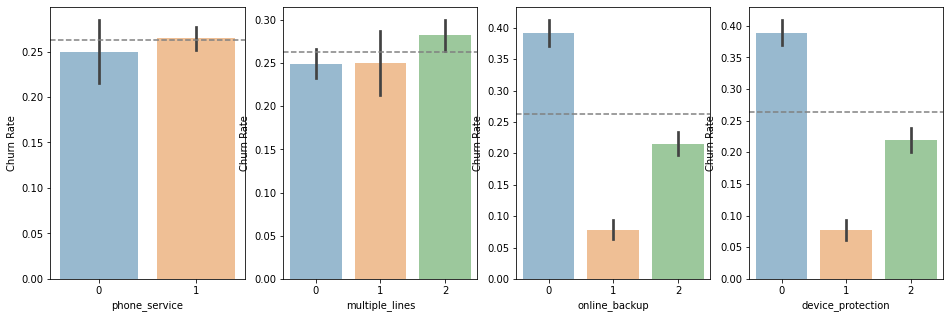

In [9]:
features = ['phone_service', 'multiple_lines', 'online_backup', 'device_protection']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [10]:
df.device_protection

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042    Yes
Name: device_protection, Length: 7043, dtype: object

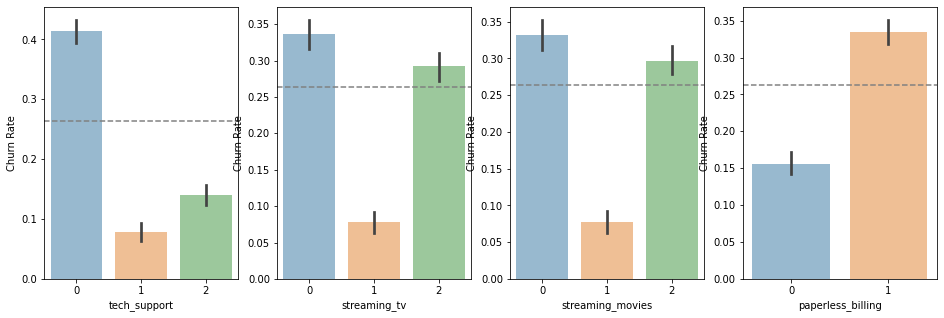

In [11]:
features = ['tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

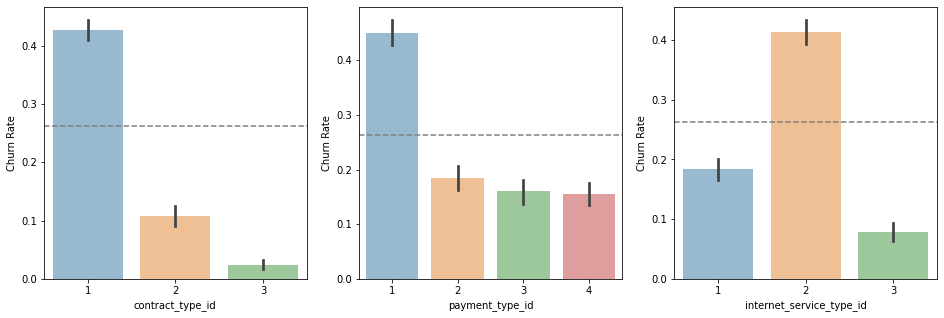

In [12]:
features = ['contract_type_id', 'payment_type_id', 'internet_service_type_id']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [13]:
df.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [14]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,total_charges_scaled,tenure_less_than_12,tenure_less_than_8
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,...,No,Yes,2,2,1,No,False,0.066294,True,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,Yes,No,1,2,1,No,False,0.060420,True,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,Yes,1,1,2,Yes,False,0.030239,True,True
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,1,1,2,Yes,False,0.140670,False,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,No,Yes,1,2,2,Yes,False,0.028687,True,True


### When are people churning?

In [40]:

pd.set_option("display.max_rows", None, "display.max_columns", None)

df.tenure.value_counts().sort_values(ascending=True)

36     50
44     51
39     56
28     57
38     59
59     60
45     61
21     63
55     64
33     64
48     64
40     64
42     65
34     65
43     65
31     65
37     65
57     65
49     66
58     67
47     68
50     68
54     68
51     68
32     69
41     70
62     70
53     70
20     71
29     72
27     72
63     72
30     72
19     73
46     74
60     76
61     76
14     76
65     76
25     79
26     79
56     80
52     80
64     80
16     80
23     85
17     87
35     88
66     89
22     90
24     94
69     95
18     97
67     98
15     99
11     99
68    100
13    109
6     110
10    116
12    117
9     119
70    119
8     123
7     131
5     133
71    170
4     176
3     200
2     238
72    362
1     624
Name: tenure, dtype: int64

In [43]:
# how many customers do we have?
total_customers = df.customer_id.count()

total_customers

7043

In [67]:
# of people churning in the first 3 months
churn_in_3 = df[df.tenure <= 3]

churn_in_3.count()

customer_id                 1062
gender                      1062
senior_citizen              1062
partner                     1062
dependents                  1062
tenure                      1062
monthly_charges             1062
total_charges               1062
phone_service               1062
multiple_lines              1062
online_security             1062
online_backup               1062
device_protection           1062
tech_support                1062
streaming_tv                1062
streaming_movies            1062
paperless_billing           1062
contract_type_id            1062
payment_type_id             1062
internet_service_type_id    1062
churn                       1062
automatic_payment           1062
total_charges_scaled        1062
tenure_less_than_12         1062
tenure_less_than_8          1062
dtype: int64

In [68]:
churn_in_3.senior_citizen.value_counts()

0    908
1    154
Name: senior_citizen, dtype: int64

In [69]:
churn_in_3.automatic_payment.value_counts()

False    912
True     150
Name: automatic_payment, dtype: int64

In [71]:
# percentage of people churning in first 3 months
1062 / 7043

0.15078801647025417

In [72]:
# percentage of those churning in the first month of those churning in 3
624 / 1062

0.5875706214689266

>15% of our customers are churning in the first 3 months of our service, 58% of those who churn in the first 3 months are churning in the first month of service

In [77]:
churn_in_6 = df[df.tenure <= 6]

churn_in_6.count()

customer_id                 1481
gender                      1481
senior_citizen              1481
partner                     1481
dependents                  1481
tenure                      1481
monthly_charges             1481
total_charges               1481
phone_service               1481
multiple_lines              1481
online_security             1481
online_backup               1481
device_protection           1481
tech_support                1481
streaming_tv                1481
streaming_movies            1481
paperless_billing           1481
contract_type_id            1481
payment_type_id             1481
internet_service_type_id    1481
churn                       1481
automatic_payment           1481
total_charges_scaled        1481
tenure_less_than_12         1481
tenure_less_than_8          1481
dtype: int64

In [79]:
churn_in_6.senior_citizen.value_counts()

0    1264
1     217
Name: senior_citizen, dtype: int64

In [80]:
churn_in_6.automatic_payment.value_counts()

False    1236
True      245
Name: automatic_payment, dtype: int64

In [82]:
# percentage of customers churning in first 6 months
1481 / 7043

0.21027971035070284

In [83]:
# percentage of those leaving in the first 3 months of those churning in 6
1062 / 1481 

0.7170830519918974

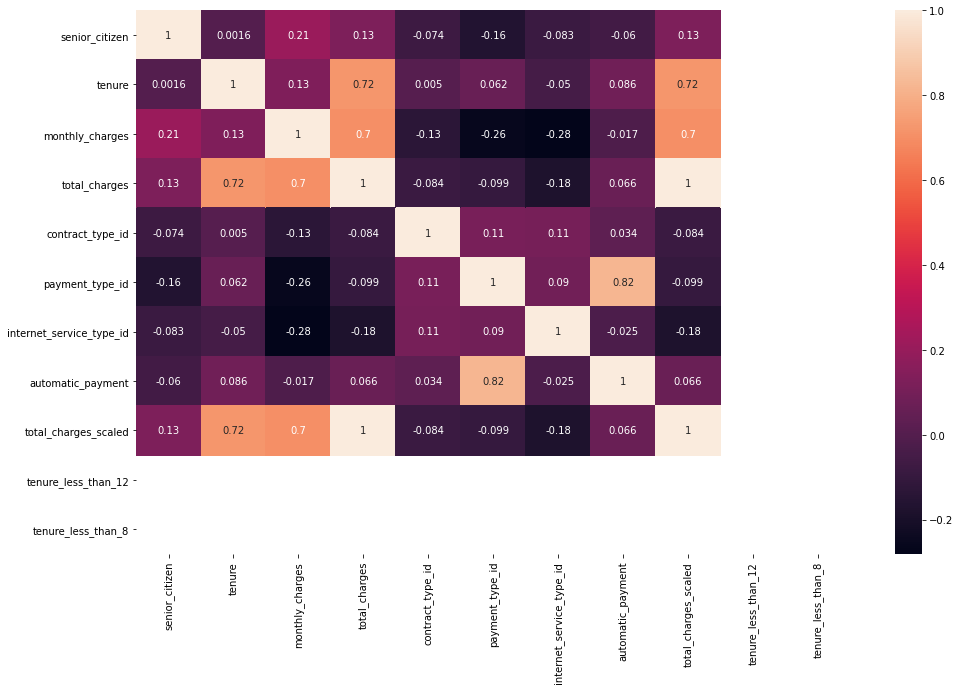

In [90]:
plt.figure(figsize=(16,10))
sns.heatmap(churn_in_3.corr(), annot=True)

## Is there a certain price people are paying where they are more likely to churn?

In [91]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,total_charges_scaled,tenure_less_than_12,tenure_less_than_8
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,No,Yes,No,Yes,Yes,No,Yes,2,2,1,No,False,0.066294,True,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,No,No,No,No,No,Yes,No,1,2,1,No,False,0.060420,True,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,No,No,Yes,No,No,No,Yes,1,1,2,Yes,False,0.030239,True,True
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,1,1,2,Yes,False,0.140670,False,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,No,No,No,Yes,Yes,No,Yes,1,2,2,Yes,False,0.028687,True,True


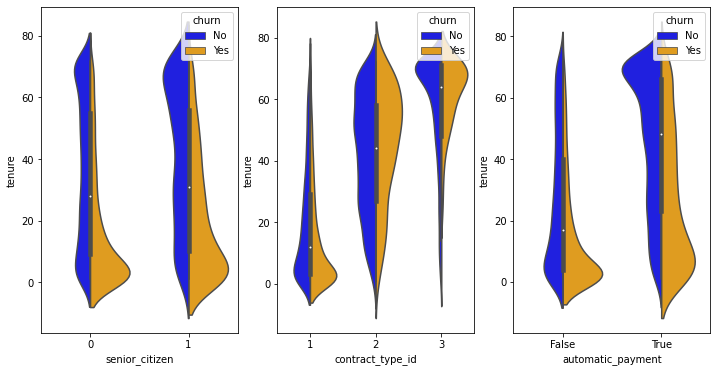

In [101]:
features = ['senior_citizen', 'contract_type_id', 'automatic_payment']
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'tenure', hue='churn',
        data=df, split=True, ax=ax[i], palette=['blue','orange'])

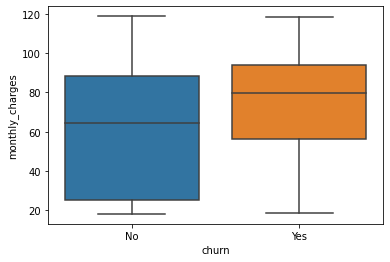

In [117]:
# distribution of churn
sns.boxplot(x='churn', y='monthly_charges', data=df)

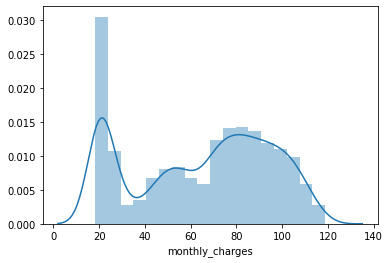

In [123]:
encoder = LabelEncoder()

encoder.fit(df.churn)
df.encoded = encoder.transform(df.churn)
x = df.monthly_charges
sns.distplot(x)

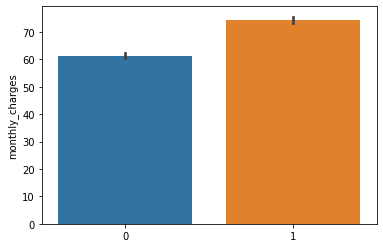

In [129]:
sns.barplot(y=df.monthly_charges, x=df.encoded)

$H_0$: people who churn are paying more per month than those who arent\
$H_a$: people who churn are paying the same or less than those who dont churn

In [149]:
# lets run a t-test to see what the probability of someone churning paying more per month
churners = df[df.churn == 'Yes']
t, p = stats.ttest_1samp(churners.monthly_charges, df.monthly_charges.mean())

print(f't = {t:.3f}')
print(f'p = {p:.61f}')

t = 16.965
p = 0.0000000000000000000000000000000000000000000000000000000000037


In [163]:
not_churners = df[df.churn == 'No']

churners.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,total_charges_scaled,tenure_less_than_12,tenure_less_than_8
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,No,No,Yes,No,No,No,Yes,1,1,2,Yes,False,0.030239,True,True
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,1,1,2,Yes,False,0.140670,False,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,No,No,No,Yes,Yes,No,Yes,1,2,2,Yes,False,0.028687,True,True
18,0022-TCJCI,Male,1,No,No,45,62.7,2791.50,Yes,No,Yes,No,Yes,No,No,Yes,No,2,4,1,Yes,True,0.319952,False,False
19,0023-HGHWL,Male,1,No,No,1,25.1,25.10,No,No phone service,No,No,No,No,No,No,Yes,1,1,1,Yes,False,0.000727,True,True


In [164]:
print(f"People who churn are paying ${churners.monthly_charges.mean():.2f} per month with a median of ${churners.monthly_charges.median()}")

People who churn are paying $74.44 per month with a median of $79.65


In [165]:
print(f"The avg per month for all customers ${df.monthly_charges.mean():.2f}, and per month with a median of ${df.monthly_charges.median()}")

The avg per month for all customers $64.76, and per month with a median of $70.35


In [167]:
print(f"People who are still with us are paying ${not_churners.monthly_charges.mean():.2f} per month with a median of ${not_churners.monthly_charges.median():.2f}")

People who are still with us are paying $61.27 per month with a median of $64.43


### modeling

In [15]:
# creating our X, y and validate datasets

train, validate = train_test_split(train, random_state=123, test_size=.2)


X_train = train[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_train = train[['churn']]
X_val = validate[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_val = validate[['churn']]
X_test = test[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_test = test[['churn']]

KeyError: "['contract_type'] not in index"

# KNN

In [ ]:
# training and fitting a k-nearest neighbors algorithim to our training data
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

### Accuracy on validation set

In [ ]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))

### messing with something i found on towards data science lol

In [ ]:
X = train.drop(columns=['customer_id', 'churn', 'payment_type', 'internet_service_type'])
y = train.churn.to_numpy()
y[0:5]

In [ ]:
# cross validation is suppose to make our model more accurate somehow...blackbox'in'itt
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

In [ ]:
# hypertuning mode parameters
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

## Random Forest 

In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [ ]:
# evaluating model
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

### Validate scores

In [ ]:
print('Accuracy of random forest classifier on val set: {:.2f}'
     .format(rf.score(X_val, y_val)))

# Test score

In [ ]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

In [ ]:
X_test

In [ ]:
X_train

## creating a CSV
- customer ID
- probability of churn
- prediction of churn

#### using the most accurate model: RF

In [ ]:
# now we concat all of our data frames so we have a good index
rf_predictions = pd.concat([X_train, X_test, X_val])

In [ ]:
rf_predictions

In [ ]:
# we add our predictions
y_pred = rf.predict(rf_predictions)

y_pred

In [ ]:
# we add our probabilities
y_pred_proba = rf.predict_proba(rf_predictions)

y_pred_proba

In [ ]:
# now we put it all together
predictions = pd.DataFrame(
    {'Customer_ID': df.customer_id,
     'Stay_Probability': y_pred_proba[:,0],
        'Churn_Probability': y_pred_proba[:,1],
     'Churn_Prediction': y_pred})

In [ ]:
predictions['actual'] = df.churn

In [ ]:
predictions.sample(50)

In [ ]:
predictions.Churn_Prediction.sum() / 5174

In [ ]:
predictions.groupby('actual').count()

In [ ]:
1869 / 5174

In [ ]:
predictions.to_csv('telco_churn_predictions.csv')